# Quick Start

To analyze a `trace.txt` that you have as the result of a run, you need to know the cpu mask of the clusters and the order of the actors as seen by the power allocator governor. This is platform specific information that can't be automatically guessed by `trappy`, so we need to tell it about them. For the cpumasks, look at the trace to know the masks, for example:
    
    $ grep -o '\Wcpus=[0-9a-f,]\+' trace.txt | sort -u
     cpus=00000000,00000006
     cpus=00000000,00000039
     
For this system we know that cpus 1-2 are the A57 cluster and cpus 0,3,4,5 are the A53 cluster. We call this the `map_label` and for this system that is:

In [4]:
map_label = {"00000000,0000000f": "A53", "00000000,000000f0": "A73"}

We will need this later. We also need to know how many actors are in the system and their order. We can get the number of actors from the trace:

    $ grep -m 1 -o 'req_power={[0-9 ]\+}' trace.txt
    req_power={0 1581 4112}

This tells us that there are three actors. We need to guess which one they are and their order, you can usually do that by looking at the data. For this example, we'll assume the first one is the GPU and the others the A57 and A53 cluster:

In [5]:
actor_order = ["GPU", "A73", "A53"]

To analyze the example `trace.txt` that is in the current folder add the following to a cell in an ipython notebook. Substitute `map_label` and `actor_order` with the ones you calculated before:

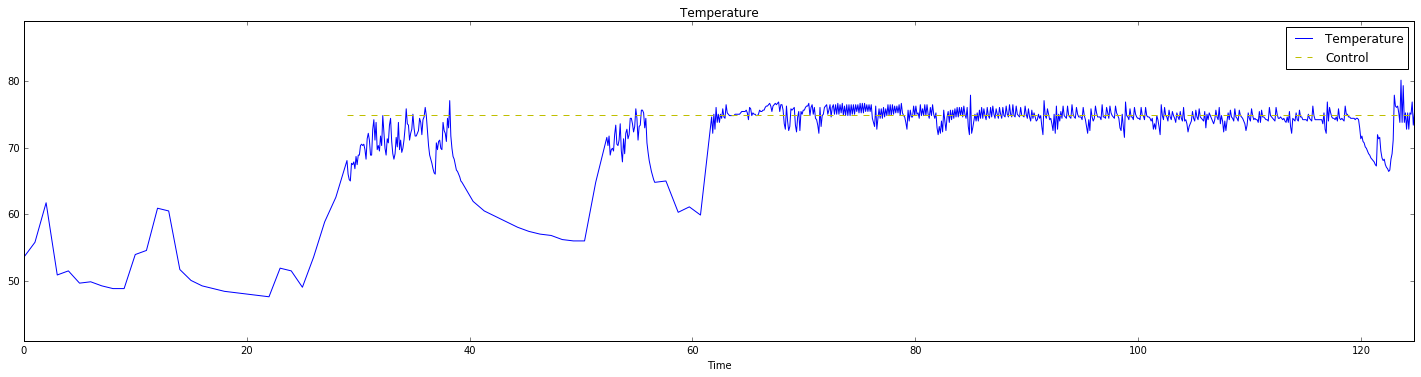

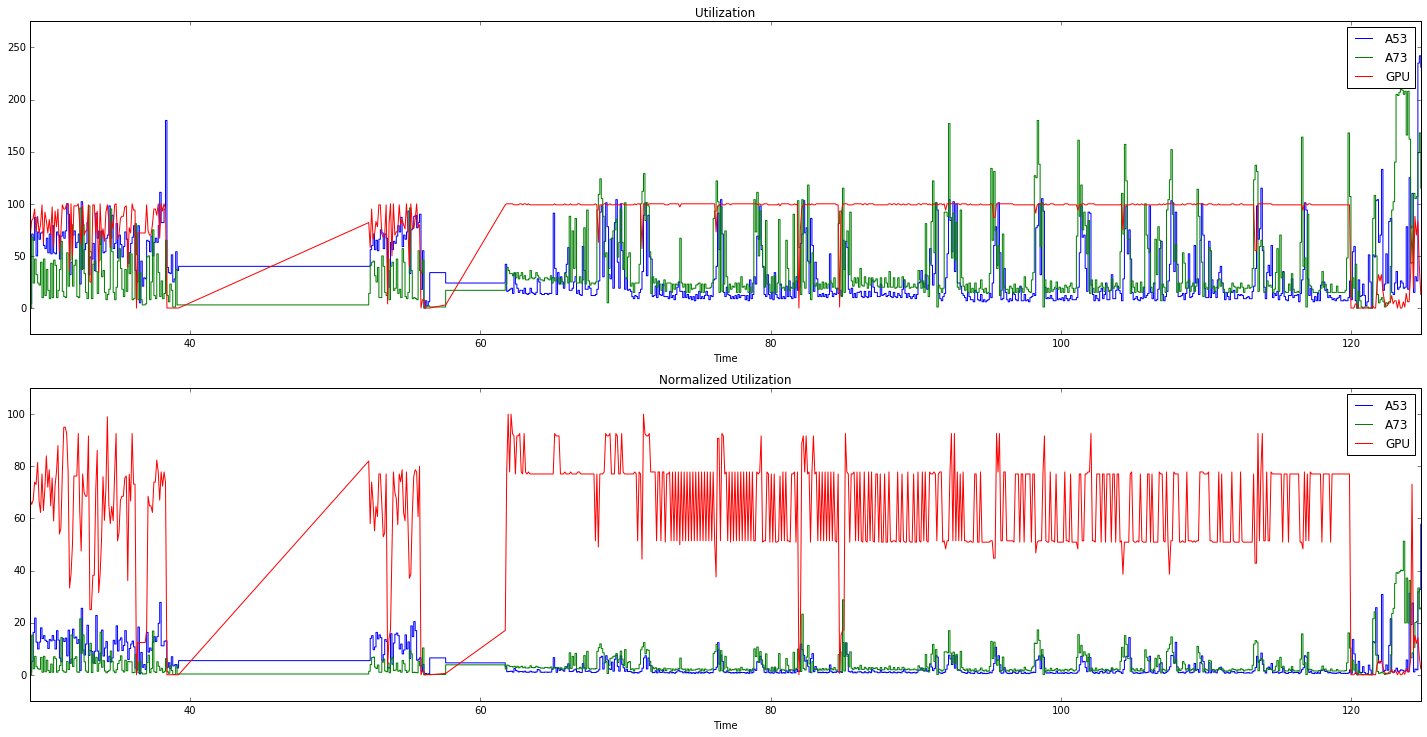

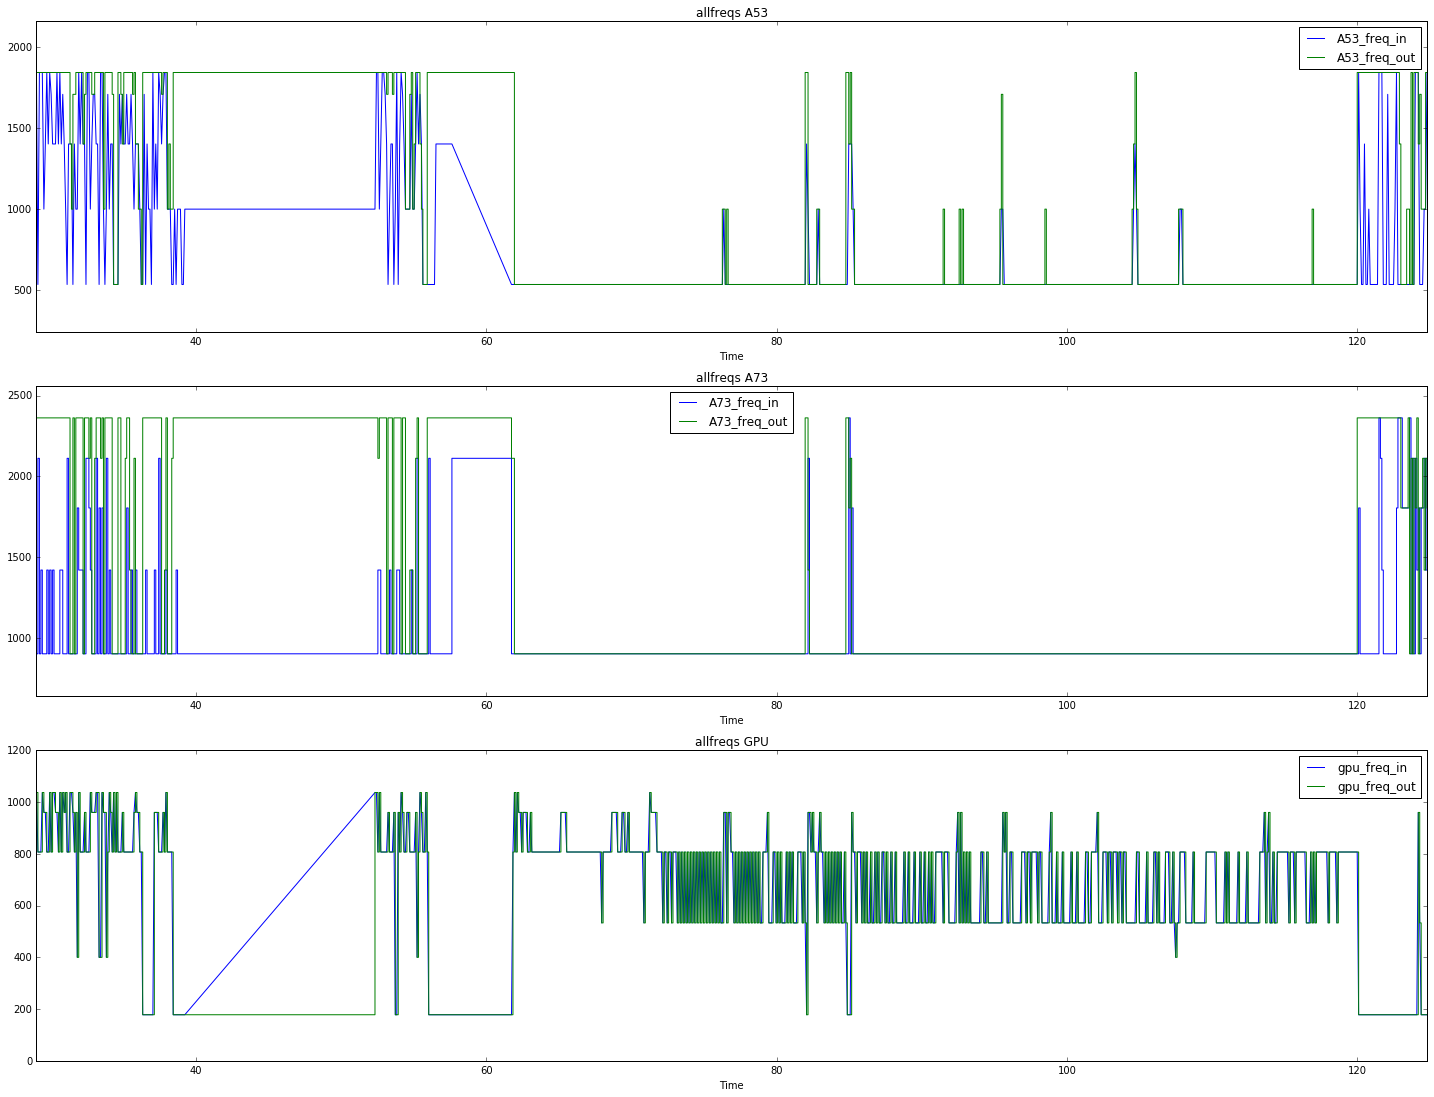

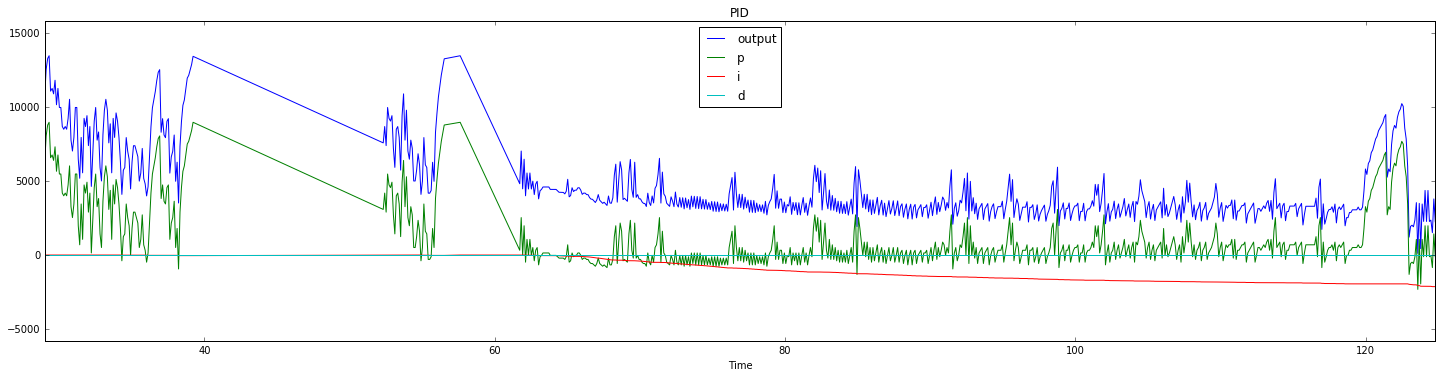

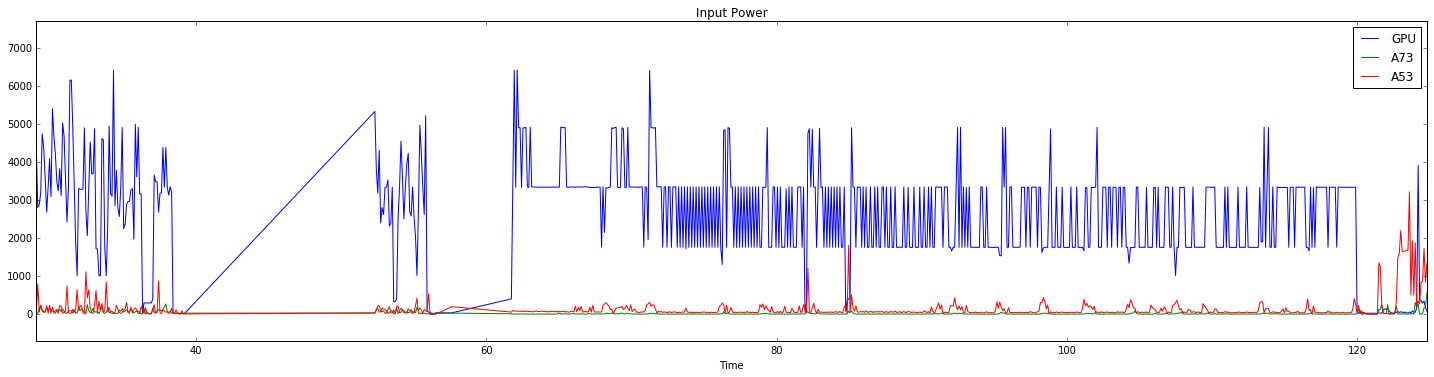

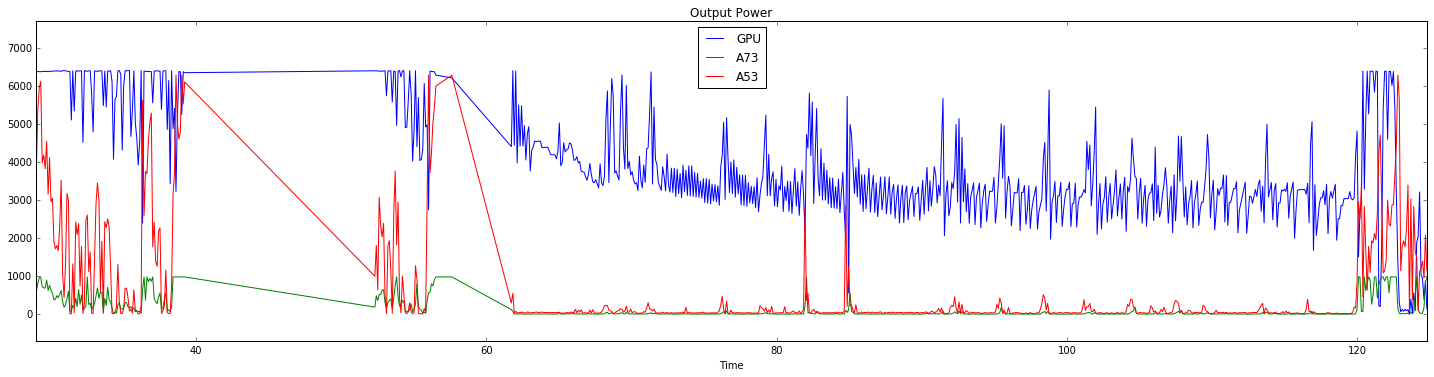

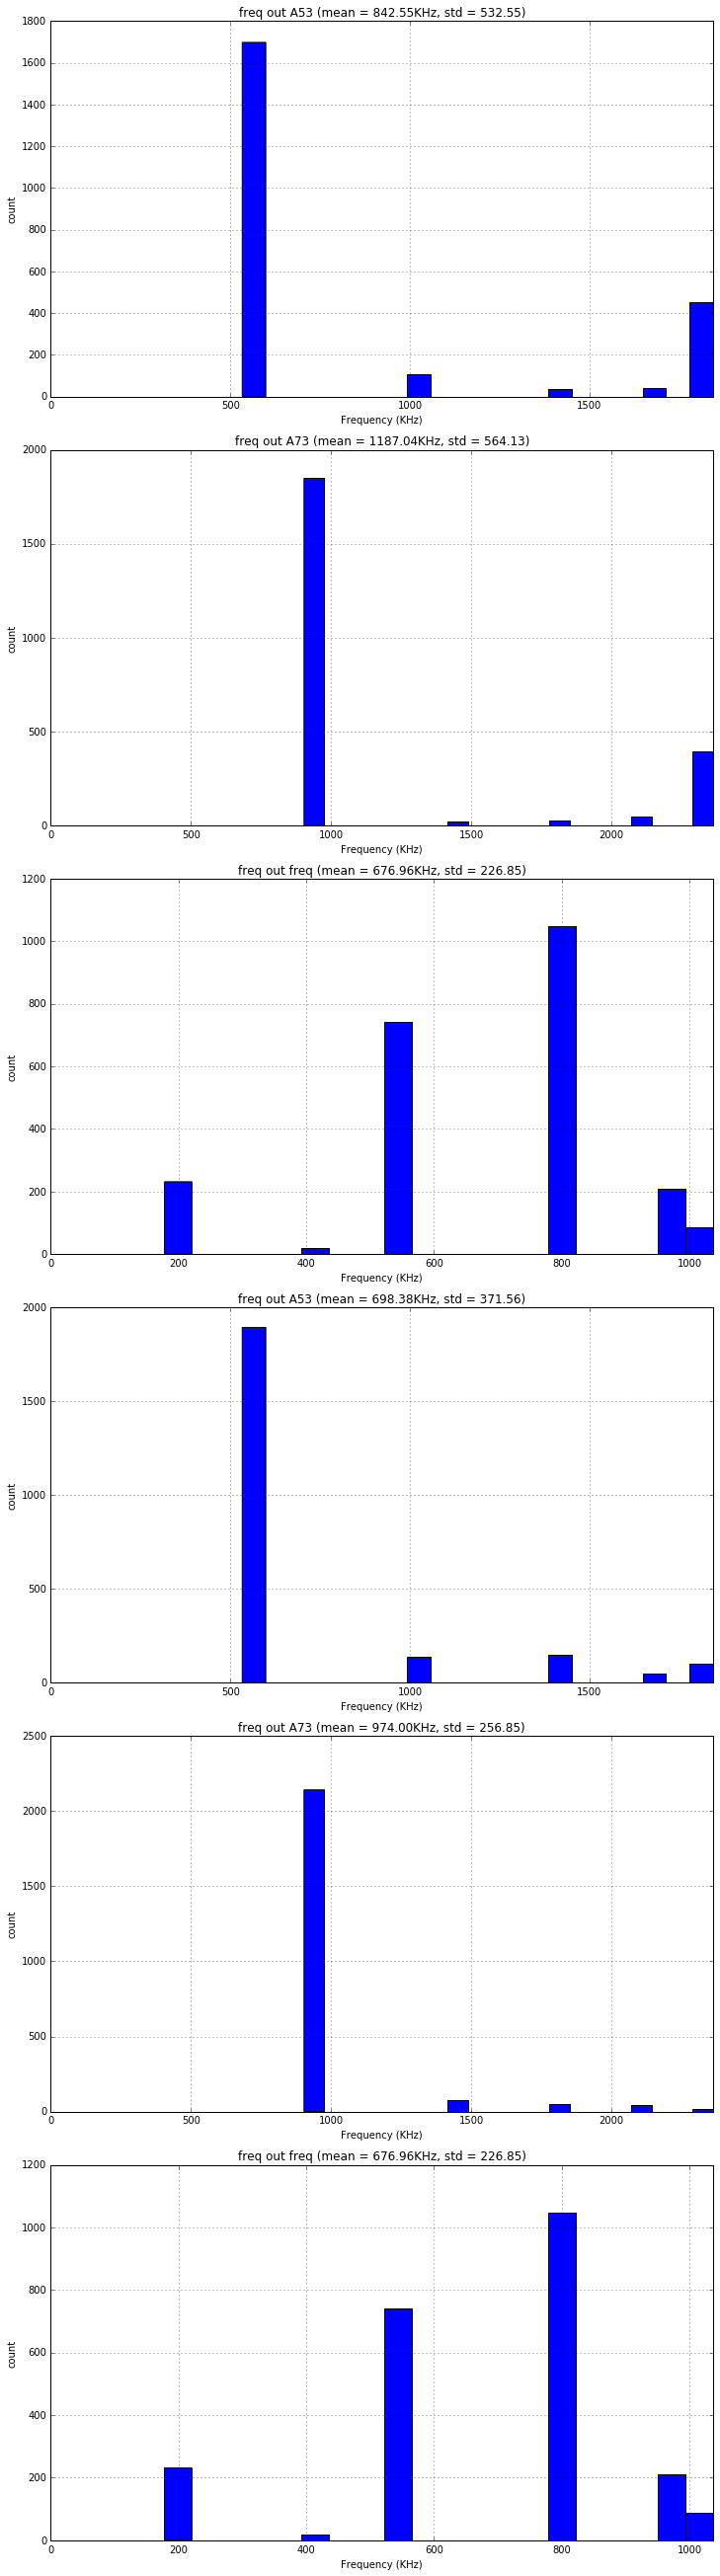

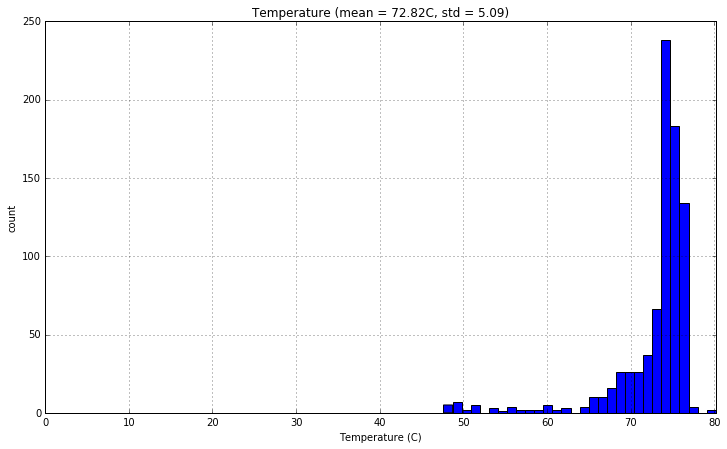

In [6]:
%matplotlib inline
import sys
sys.path.append("..")
import trappy

map_label = {"00000000,0000000f": "A53", "00000000,000000f0": "A73"}
actor_order = ["GPU", "A73", "A53"]

trappy.summary_plots(actor_order, map_label, path="./trace.txt")